In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [132]:
df = pd.read_csv(r"C:\Users\Usuario\Desktop\Auto2\Lab1\Cancer_Data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [133]:
df = df.drop(columns=['id', 'Unnamed: 32'])


In [134]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
df.dtypes



diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

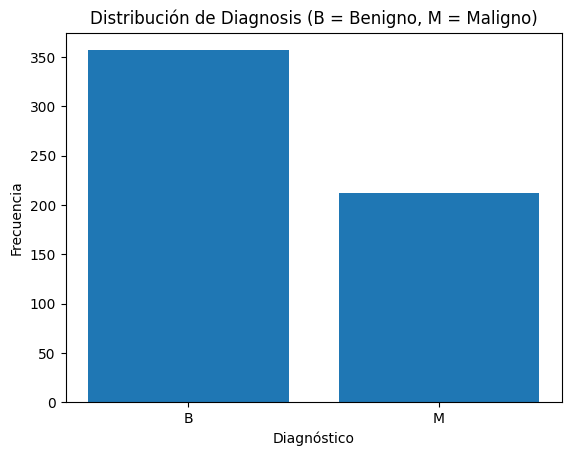

In [15]:
conteo = df['diagnosis'].value_counts()
plt.bar(conteo.index, conteo.values)
plt.title("Distribución de Diagnosis (B = Benigno, M = Maligno)")
plt.xlabel("Diagnóstico")
plt.ylabel("Frecuencia")
plt.show()


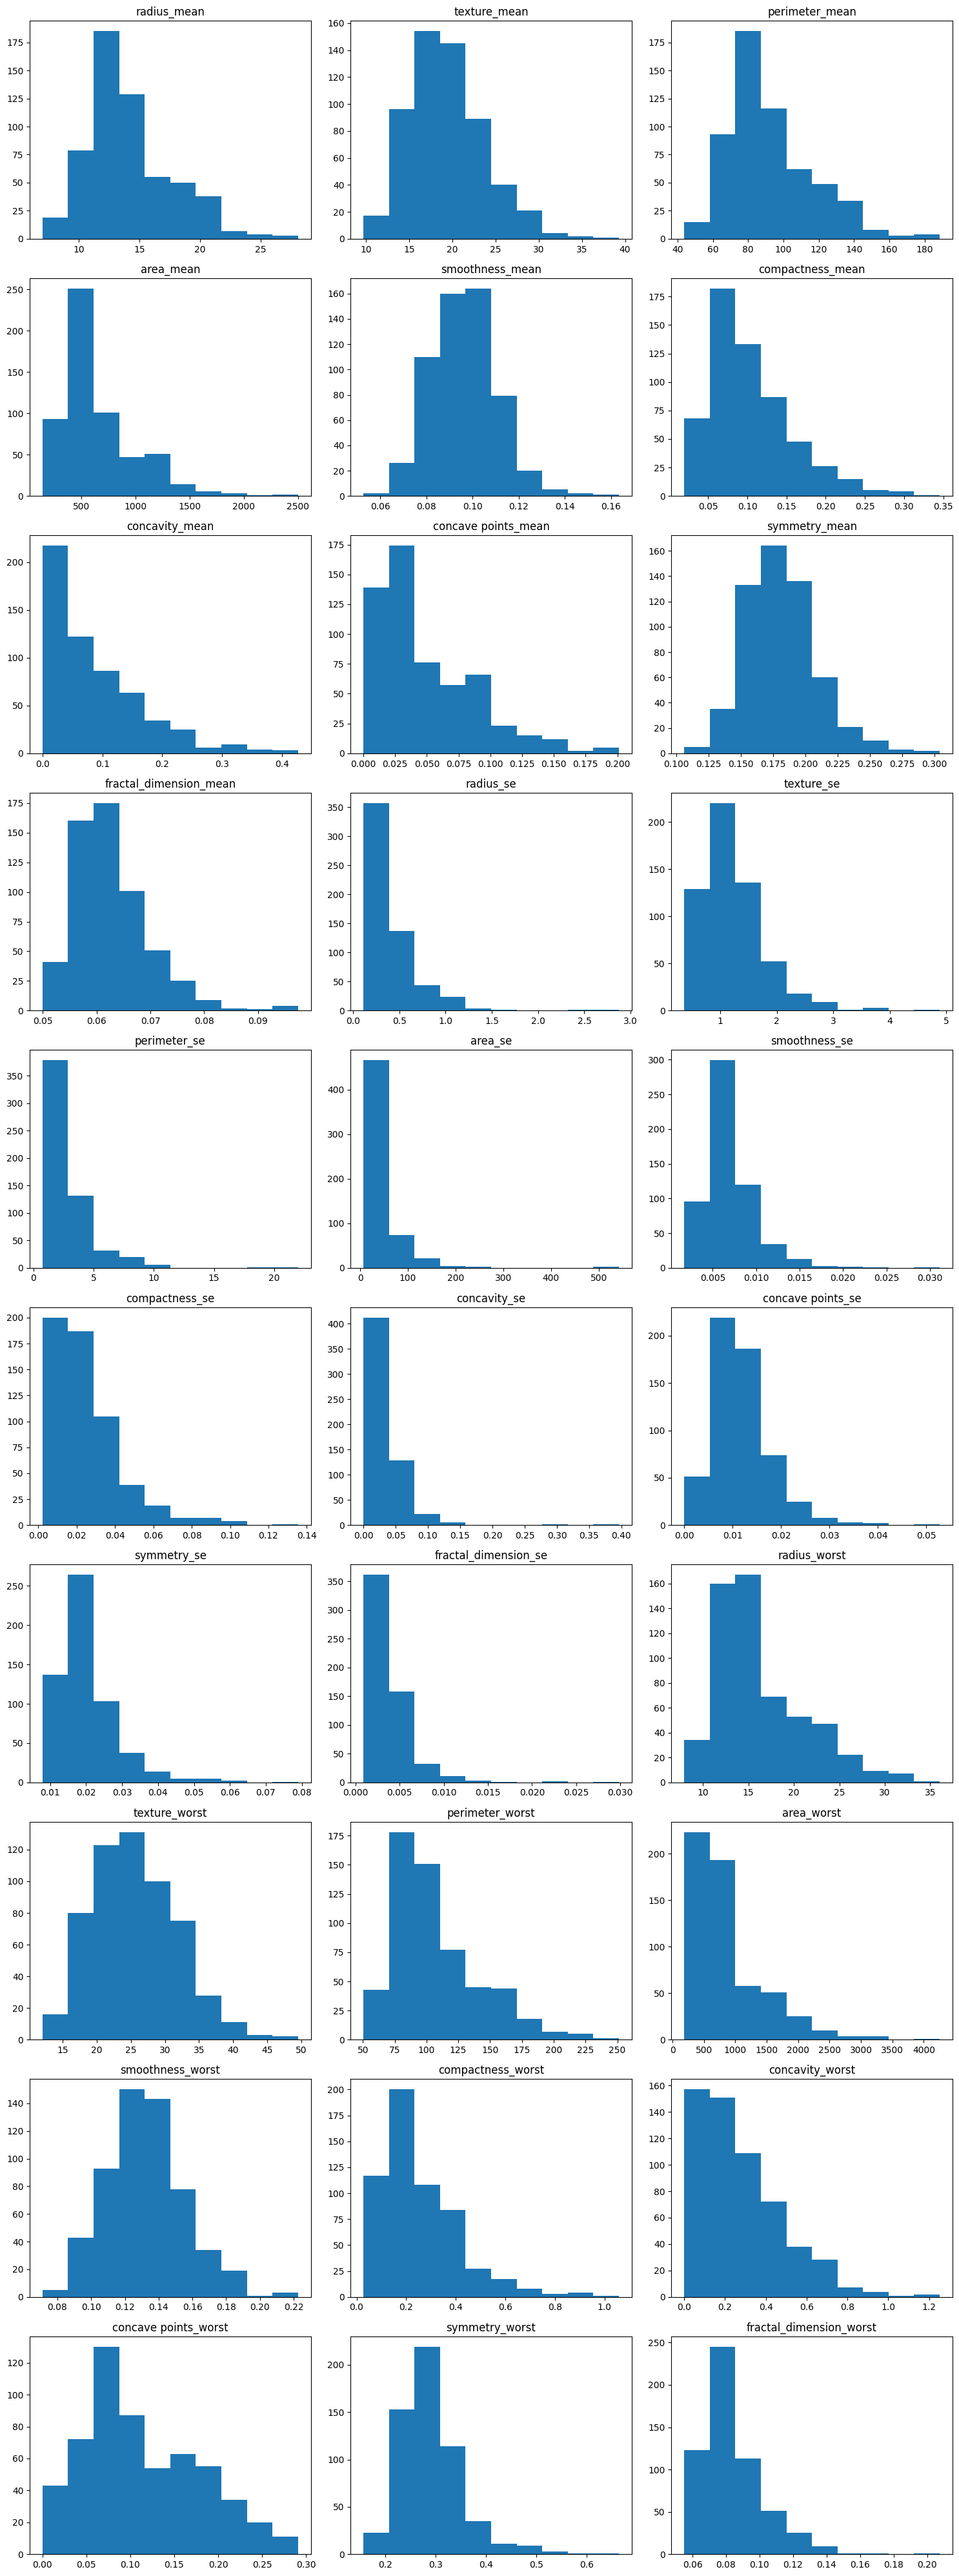

In [ ]:
# Columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # filas necesarias
plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.hist(df[col])  # histograma por defecto
    plt.title(col)

plt.tight_layout()
plt.show()

In [17]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [100]:
df.describe(include=['object'])

,diagnosis
count,569
unique,2
top,B
freq,357


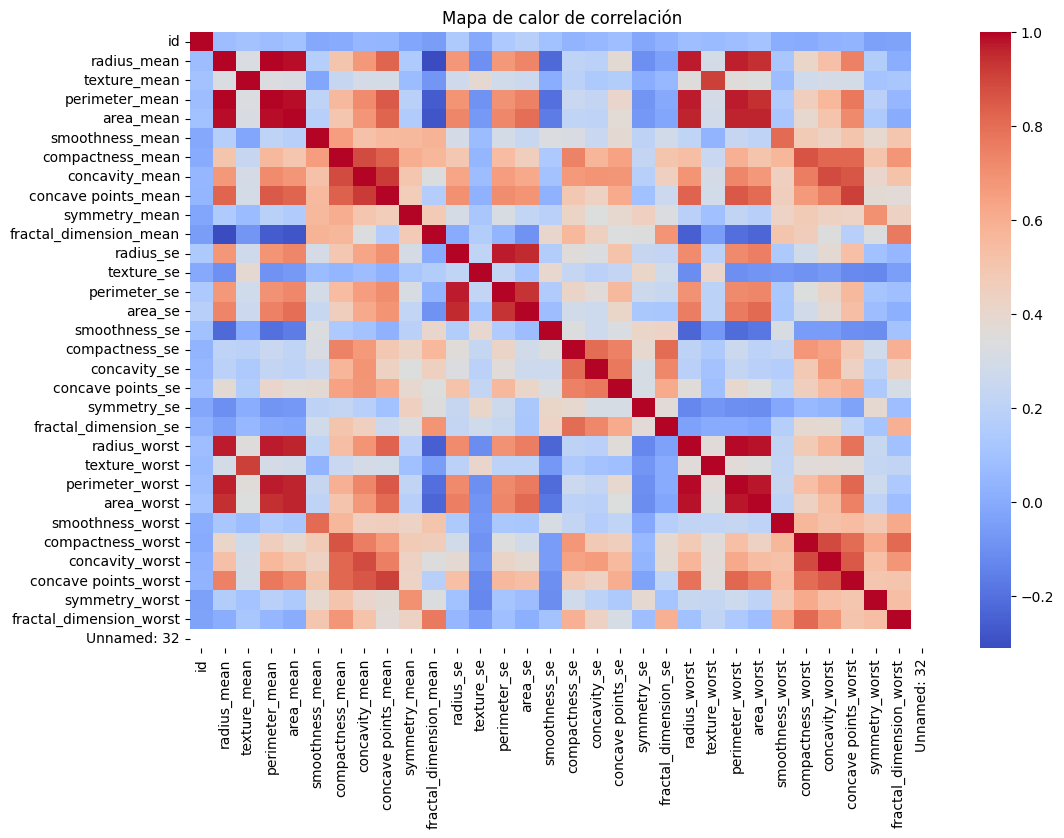

In [101]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True)
plt.title("Mapa de calor de correlación")
plt.show()

In [ ]:
# B = 0 (Benigno), M = 1 (Maligno)
df['diagnosis_num'] = df['diagnosis'].map({'B': 0, 'M': 1})
num_cols = df.select_dtypes(include=['int64', 'float64'])
# Correlación target con las variables
corr_with_target = num_cols.corr()['diagnosis_num'].sort_values(ascending=False)
print(corr_with_target)

diagnosis_num              1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [103]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis_num              0
dtype: int64

In [ ]:
X = df.drop(columns=['diagnosis']) #Variables menos el target
y = df['diagnosis'] #Target

X_temp, X_test, y_temp, y_test = train_test_split( #Validacion y test
    X, y, test_size=0.15, random_state=42 
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42
)


In [155]:
X = df.drop(columns=['diagnosis'])   # Variable
y = df['diagnosis'].map({'B': 0, 'M': 1})  # target

In [ ]:

num_features = X.columns  # identifico columnas numericas

# Solo estandarizo numericas
num_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())   # estandarización
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features)
    ]
)

#Pipeline final
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor)
])

X_train_proc = pipeline.fit_transform(X_train)
X_val_proc   = pipeline.transform(X_val)
X_test_proc  = pipeline.transform(X_test)

In [ ]:
# modelo KNN 
knn = KNeighborsClassifier(n_neighbors=22)  # puedes ajustar k

# Datos escalados
knn.fit(X_train_proc, y_train)

#Predecir
y_val_pred = knn.predict(X_val_proc)

# Evaluar
knn_metrics = {
    'Accuracy': accuracy_score(y_val, y_val_pred),
    'Precision': precision_score(y_val, y_val_pred, pos_label='M'),
    'Recall': recall_score(y_val, y_val_pred, pos_label='M'),
    'F1-score': f1_score(y_val, y_val_pred, pos_label='M')
}

print(knn_metrics)

{'Accuracy': 0.9767441860465116, 'Precision': 1.0, 'Recall': 0.9259259259259259, 'F1-score': 0.9615384615384616}


In [ ]:
# Random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar
rf.fit(X_train_proc, y_train)

# Prediccion
y_val_pred_rf = rf.predict(X_val_proc)

rf_metrics = {
    'Accuracy': accuracy_score(y_val, y_val_pred_rf),
    'Precision': precision_score(y_val, y_val_pred_rf, pos_label='M'),
    'Recall': recall_score(y_val, y_val_pred_rf, pos_label='M'),
    'F1-score': f1_score(y_val, y_val_pred_rf, pos_label='M')
}

print(rf_metrics)

{'Accuracy': 0.9418604651162791, 'Precision': 0.9583333333333334, 'Recall': 0.8518518518518519, 'F1-score': 0.9019607843137255}


In [138]:
y_train = y_train.map({'B': 0, 'M': 1})
y_val   = y_val.map({'B': 0, 'M': 1})
y_test  = y_test.map({'B': 0, 'M': 1})
y_train_np = np.array(y_train).astype(np.float32)
y_val_np   = np.array(y_val).astype(np.float32)

In [ ]:
input_dim = X_train_proc.shape[1]  # número de características

model = Sequential([
    Dense(512, activation='relu', input_shape=(input_dim,)),  # capa oculta 1
    Dense(128, activation='relu'),                             # capa oculta 2
    Dense(64, activation='relu'),                             #Capa oculta2
    Dense(32, activation='relu'),                             #Capa oculta 3
    Dense(1, activation='sigmoid')                            # capa de salida de dos clases binaria
])

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),   # optimizzacion
    loss='binary_crossentropy',            # clasificación binaria
    metrics=['accuracy']                 
)

In [141]:
history = model.fit(
    X_train_proc, y_train_np,
    validation_data=(X_val_proc, y_val_np),
    epochs=20,
    batch_size=16,
    verbose=1
)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9395 - loss: 0.2259 - val_accuracy: 0.9884 - val_loss: 0.0673
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9748 - loss: 0.0734 - val_accuracy: 0.9884 - val_loss: 0.0597
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9849 - loss: 0.0435 - val_accuracy: 0.9884 - val_loss: 0.0327
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9899 - loss: 0.0311 - val_accuracy: 0.9884 - val_loss: 0.0573
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9924 - loss: 0.0326 - val_accuracy: 0.9884 - val_loss: 0.0526
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9874 - loss: 0.0527 - val_accuracy: 0.9884 - val_loss: 0.0693
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9899 - loss: 0.0250 - val_accuracy: 0.9884 - val_loss: 0.0292
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9924 - loss: 0.0134 - val_accuracy: 0.9884 - val_loss:

In [ ]:
y_val_pred_dnn = model.predict(X_val_proc)
y_val_pred_dnn = (y_val_pred_dnn > 0.5).astype(int).flatten()

dnn_metrics = {
    'Accuracy': accuracy_score(y_val_np, y_val_pred_dnn),
    'Precision': precision_score(y_val_np, y_val_pred_dnn),
    'Recall': recall_score(y_val_np, y_val_pred_dnn),
    'F1-score': f1_score(y_val_np, y_val_pred_dnn)
}

print(dnn_metrics)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-score': 1.0}


In [158]:
resultados = {
    'KNN': knn_metrics,
    'Random Forest': rf_metrics,
    'DNN': dnn_metrics
}

df_comparativo = pd.DataFrame(resultados)
print(df_comparativo)

                KNN  Random Forest  DNN
Accuracy   0.976744       0.941860  1.0
Precision  1.000000       0.958333  1.0
Recall     0.925926       0.851852  1.0
F1-score   0.961538       0.901961  1.0


In [ ]:
# Para crear los datos solo se seleccionan las columnas numericas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_muestras = 10000

# Valores aleatorios pero dentro del rango de las columnas 
datos_aleatorios = {col: np.random.uniform(df[col].min(), df[col].max(), n_muestras)
                    for col in num_cols}

df2 = pd.DataFrame(datos_aleatorios)


In [173]:
df2

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,11.753241,34.624048,184.485764,1329.954002,0.130539,0.032265,0.381349,0.123520,0.171726,0.050419,...,16.958687,41.392013,69.682090,2201.391909,0.127491,0.775651,0.590322,0.260287,0.421188,0.150229
1,23.960381,17.225053,70.958069,349.758738,0.113972,0.125487,0.140116,0.161724,0.132624,0.078542,...,35.001495,14.189048,189.337346,1179.649119,0.195827,0.724110,0.690234,0.136650,0.325257,0.104621
2,13.042676,34.548065,86.369720,477.875936,0.069971,0.065171,0.076192,0.197737,0.234910,0.055325,...,11.301831,40.122545,223.948561,363.156777,0.131277,0.710409,0.053842,0.242680,0.299548,0.064893
3,15.771918,29.386002,157.777029,2224.121253,0.154205,0.324206,0.025213,0.119953,0.258202,0.095484,...,32.620917,35.254295,114.306821,1709.980234,0.215484,0.777409,0.600385,0.123091,0.302817,0.164663
4,7.545207,34.105428,181.680308,695.372743,0.073018,0.086576,0.244897,0.181826,0.133213,0.056121,...,21.703276,28.696812,59.483264,2454.673276,0.119419,0.699587,1.014424,0.036860,0.309544,0.097376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,17.010521,12.242223,46.638467,1819.821757,0.147067,0.101199,0.231296,0.171705,0.207225,0.087369,...,16.768394,34.319063,250.647820,2733.345397,0.197921,0.499586,0.089388,0.210826,0.226035,0.122814
9996,7.445543,27.589396,86.896900,2096.743595,0.086107,0.283628,0.157433,0.171833,0.183931,0.096288,...,30.128256,17.497947,80.951687,2412.991599,0.185228,0.339772,0.575028,0.247456,0.233510,0.201930
9997,18.163177,32.683976,65.640202,609.929438,0.087409,0.233430,0.318465,0.183826,0.192016,0.054354,...,31.273015,40.918113,146.826780,3016.539079,0.217139,0.659295,0.704787,0.022720,0.315062,0.085998
9998,14.296617,22.523037,110.556565,1979.983895,0.107160,0.019848,0.203715,0.072236,0.194868,0.060224,...,27.851781,18.202082,143.011705,1767.627647,0.171524,0.561767,0.893591,0.289005,0.347134,0.130985


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_proc)  
X_nuevas = scaler.transform(df2)
y_nuevas_pred_rf = rf.predict(X_nuevas)
clases, conteos = np.unique(y_nuevas_pred_rf, return_counts=True)
for clase, count in zip(clases, conteos):
    print(f"Clase {clase}: {count} predicciones ({count/n_muestras*100:.2f}%)")


Clase M: 10000 predicciones (100.00%)


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
